In [1]:
import pandas as pd

data = {'value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

df['value_diff'] = df['value'].diff()
df

,value,value_diff
0,10,NaN
1,20,10.0
2,30,10.0
3,40,10.0
4,50,10.0


Single frequency

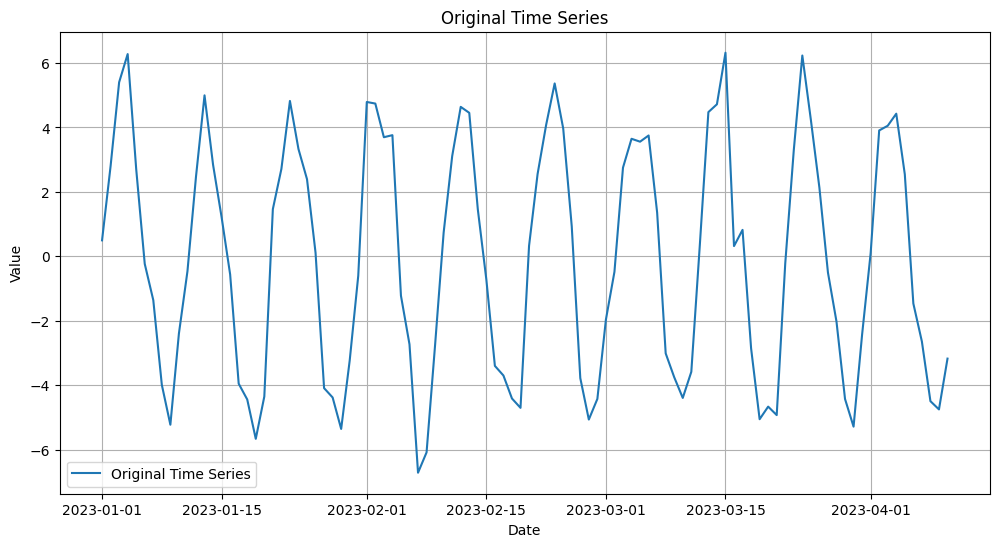

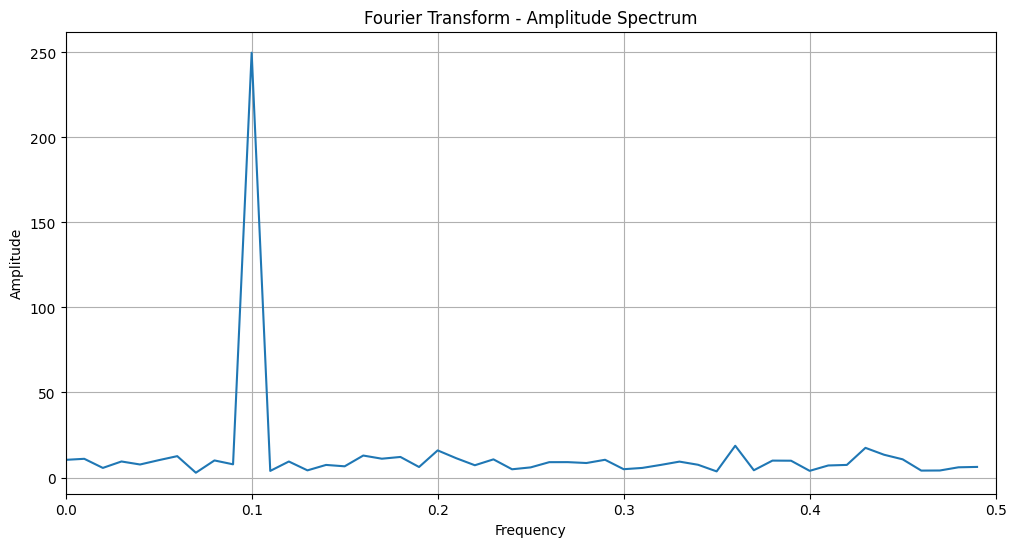

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', periods=100, freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['value'] = (
    5 * np.sin(2 * np.pi * df.index / 10) +
    np.random.normal(0, 1, len(df))
)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

fft_values = np.fft.fft(df['value'])
frequencies = np.fft.fftfreq(len(fft_values), d=1)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title('Fourier Transform - Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.grid()
plt.show()


Time series with multiple frequencies

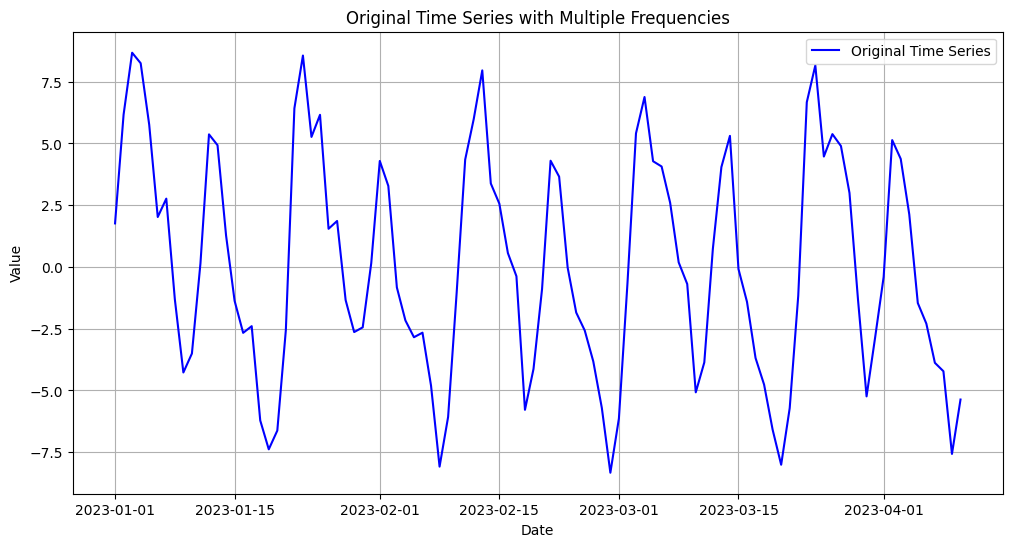

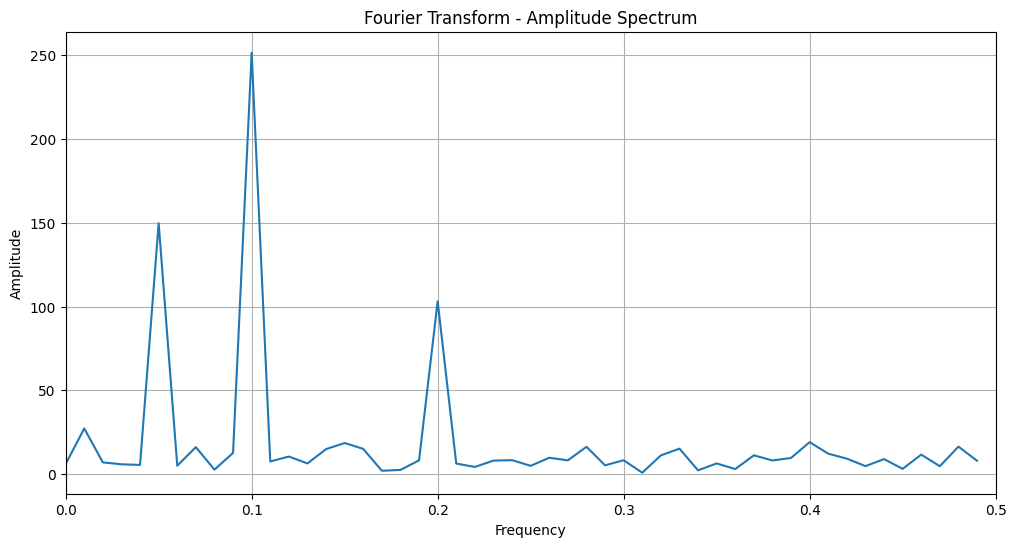

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
date_rng = pd.date_range(start='2023-01-01', periods=100, freq='D')
df = pd.DataFrame(date_rng, columns=['date'])

df['value'] = (
    5 * np.sin(2 * np.pi * df.index / 10) +
    2 * np.sin(2 * np.pi * df.index / 5) +
    3 * np.sin(2 * np.pi * df.index / 20) +
    np.random.normal(0, 1, len(df))
)

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'], label='Original Time Series', color='blue')
plt.title('Original Time Series with Multiple Frequencies')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

fft_values = np.fft.fft(df['value'])
frequencies = np.fft.fftfreq(len(fft_values), d=1)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title('Fourier Transform - Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.grid()
plt.show()


Used to explain amplitude vs frequency vs phase

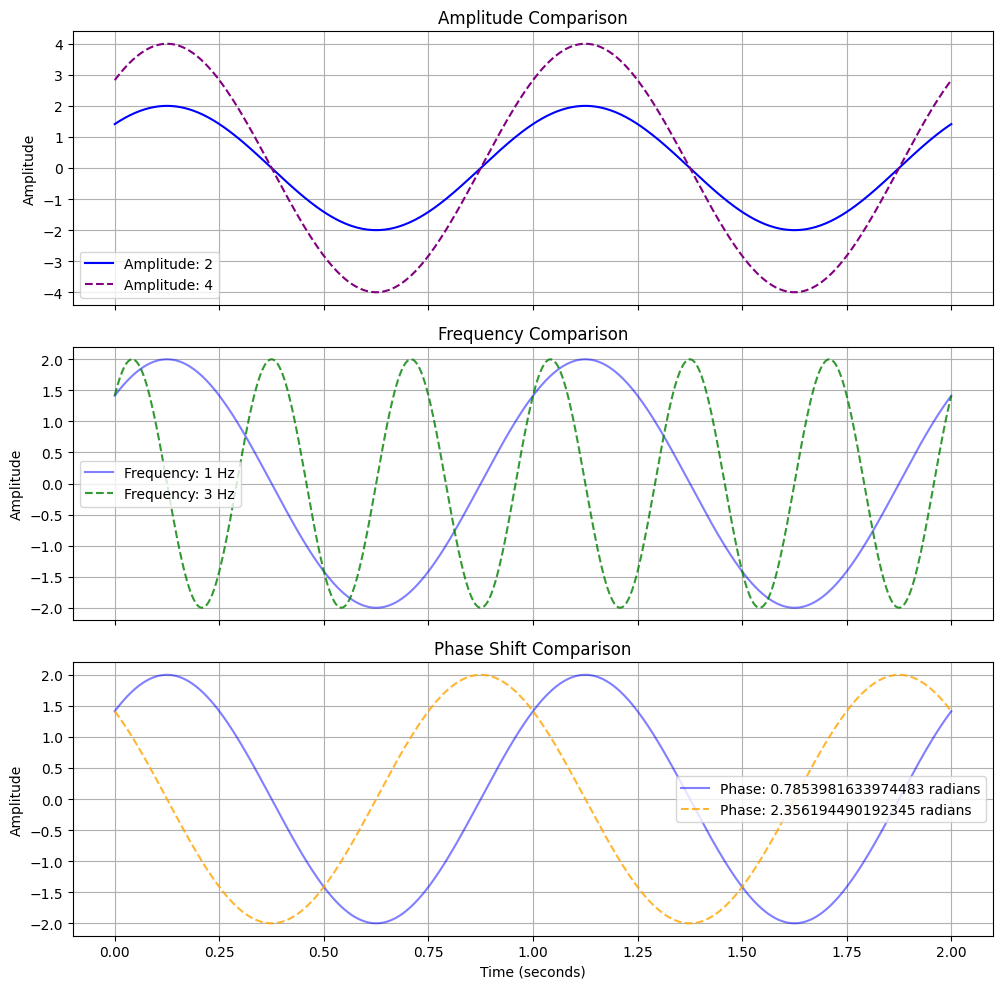

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 1
amplitude_1 = 2
amplitude_2 = 4
phase = np.pi / 4
time = np.linspace(0, 2, 500)

wave_amplitude_1 = amplitude_1 * np.sin(2 * np.pi * frequency * time + phase)
wave_amplitude_2 = amplitude_2 * np.sin(2 * np.pi * frequency * time + phase)

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(time, wave_amplitude_1, color="b", label=f'Amplitude: {amplitude_1}')
axs[0].plot(time, wave_amplitude_2, color="purple", linestyle="--", label=f'Amplitude: {amplitude_2}')
axs[0].legend()
axs[0].set_title("Amplitude Comparison")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

high_frequency_wave = amplitude_1 * np.sin(2 * np.pi * 3 * frequency * time + phase)
axs[1].plot(time, wave_amplitude_1, color="b", alpha=0.5, label=f'Frequency: {frequency} Hz')
axs[1].plot(time, high_frequency_wave, color="g", linestyle="--", alpha=0.8, label=f'Frequency: {3 * frequency} Hz')
axs[1].legend()
axs[1].set_title("Frequency Comparison")
axs[1].set_ylabel("Amplitude")
axs[1].grid()

phase_shifted_wave = amplitude_1 * np.sin(2 * np.pi * frequency * time + phase + np.pi / 2)
axs[2].plot(time, wave_amplitude_1, color="b", alpha=0.5, label=f'Phase: {phase} radians')
axs[2].plot(time, phase_shifted_wave, color="orange", linestyle="--", alpha=0.8, label=f'Phase: {phase + np.pi/2} radians')
axs[2].legend()
axs[2].set_title("Phase Shift Comparison")
axs[2].set_xlabel("Time (seconds)")
axs[2].set_ylabel("Amplitude")
axs[2].grid()

plt.tight_layout()
plt.show()
